# Parameter Testing

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from scipy import special, stats

# Point Estimator

To estimate the population parameters (e.g. average income of man with a master degree), we compute corresponding characteristics of the sample, referred to as **sample statistic**. 

Any types of single value sample statistic is called **point estimator**, previously we have seen  **Sample mean, standard deviation, variance**, which all are point estimators of populations. For instance, $\bar{x}$ is the point estimator of $μ$ and $s^2$ the point estimator of $σ^2$.

# Sample Size and Estimation Accuracy

Here is a concrete example that demonstrates how sample sizes influence the estimation accuracy.

To estimate the average height of female in the city of Helsinki, we measure the height of $n = 30$ female adults, we have the sample mean but we also would like to know if the sample mean is within $± 1.5cm$ of population mean. And we need to have a key but unrealistic assumption: we know the population standard deviation of the height: $σ = 6 cm$.

Step 1: Because we know the $σ$, we can calculate the standard error of the mean by using 

$$
\begin{equation}
σ_{\bar{x}}=\frac{σ}{\sqrt{n}}= \frac{6}{\sqrt{30}}
\end{equation}
$$

In [3]:
sigma = 6
std_err = sigma/np.sqrt(30)
std_err

1.0954451150103321

Step 2: Calculate of range in terms of standard errors.

In [4]:
z_right = 1.5/std_err # plus or minus zr/zl units of std errors
z_left = -1.5/std_err

In [5]:
p = stats.norm.cdf(z_right) - stats.norm.cdf(z_left)
print(
    f'The probability of sample mean (sample size = 30) being within 1.5cm of pop mean is {p*100:.2f}%.'
)

The probability of sample mean (sample size = 30) being within 1.5cm of pop mean is 82.91%.


Now let's increase the sample size to 60 persons. 

In [6]:
sigma = 6
ss = 60

std_err = sigma / np.sqrt(ss)
zr = 1.5 / std_err
zl = -1.5 / std_err
p = stats.norm.cdf(zr) - stats.norm.cdf(zl)
print(
    f'The probability of sample mean (sample size = {ss}) being within 1.5cm of pop mean is {p*100:.2f}%.'
)


The probability of sample mean (sample size = 60) being within 1.5cm of pop mean is 94.72%.


And this figure can show how the sample size can influence the estimation accuracy. We will come back to similar topics in interval estimations.

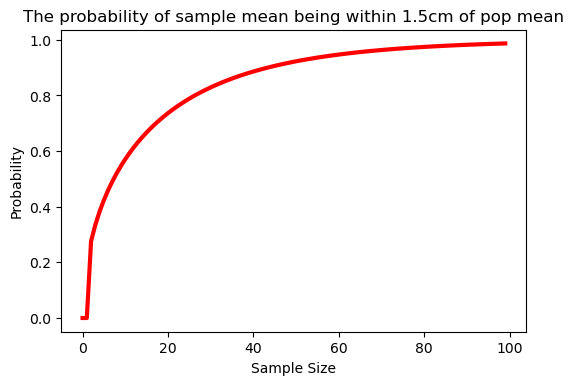

In [7]:
sigma = 6
p = np.zeros(100)

for i in range(2, 100):
    std_err = sigma / np.sqrt(i)
    zr = 1.5 / std_err
    zl = -1.5 / std_err
    p[i] = stats.norm.cdf(zr) - stats.norm.cdf(zl)

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(np.arange(100), p, lw=3, color='r')
ax.set(xlabel='Sample Size',
       ylabel='Probability',
       title='The probability of sample mean being within 1.5cm of pop mean')
plt.show()

# Interval Estimation With Known $σ$

The example above is exactly an **interval estimation** of population mean with known $σ$. We will dive deeper here, once you understand the logic of interval estimation, you will have much easier time in later chapters.

We have talked about _Central Limit Theorem_ which guarantees that $\bar{X}$ is normally distributed with sufficiently large samples. But we almost always convert $\bar{X}$ into a standard normal distribution before making any inferences.
$$
Z=\frac{\bar{x}-μ}{σ/\sqrt{n}}
$$

Essentially, it is a $z$-score of $\bar{X}$ as we mentioned in chapter 1. To make any meaningful interval estimation, we need a notation $z_{α/2}$, such as $z_{0.025}=1.96$. It means the area to the right of $1.96$ is $0.025$.

To establish an interval
$$
P\bigg(-z_{α/2} < \frac{\bar{x}-μ}{σ/\sqrt{n}} < z_{α/2}\bigg)=.95
$$
With a bit rearrangement, which means that with $1-α$ probability the $X$ will fall in this range.
$$
P\bigg(μ-z_{α/2}\frac{σ}{\sqrt{n}} < \bar{x}< μ+z_{α/2}\frac{σ}{\sqrt{n}}\bigg)=1-α
$$

The sample mean of women's height in Helsinki will fall in 
$$
P\bigg(170-1.96\frac{6}{\sqrt{30}} < \bar{x}< 170+1.96\frac{6}{\sqrt{30}}\bigg)=.95
$$

In [8]:
print(170-1.96*6/np.sqrt(30))
print(170+1.96*6/np.sqrt(30))

167.85292757457975
172.14707242542025


However expression above is less common in practice, more commonly $μ$ is set as the centre of the interval, a slight rearrangement gives us
$$
P\bigg(\bar{x}-Z_{α/2}\frac{σ}{\sqrt{n}}<μ<\bar{x}+Z_{α/2}\frac{σ}{\sqrt{n}}\bigg)
$$

this is officially called **confidence interval estimator of population mean**. It states that there is $1-α$ probability that $\bar{X}$ will equal to a value such that the interval will include the population mean.

## Example of Sleeping Hours

Suppose we have a sample of ten old person (>70 years old) whose average sleeping time recorded as below

In [9]:
sleep_time = [8.3, 6.9, 4.3, 10.8, 7.9, 9.6, 6.8, 5.6, 7.7]

The standard deviation of the population sleeping time is $2$, enough information to calculate the confidence interval of $95\%$.

In [10]:
LCL = np.mean(sleep_time) - 1.96 * 2 / np.sqrt(len(sleep_time))
UCL = np.mean(sleep_time) + 1.96 * 2 / np.sqrt(len(sleep_time))
print(f'Confidence interval of 95% is ({LCL:.2f}, {UCL:.2f}).')

Confidence interval of 95% is (6.24, 8.85).


Because the sample size is considerably small, the confidence interval doesn't provide much info either. 

Here we've created a class for population of old people's sleeping time with some methods for easy computation of interval estimators, i.e. ```conf_interval``` for _known $σ$_ and ```conf_interval_t``` for _unknown $σ$_.

In [11]:
class OldPeopleSleep:
    def __init__(self, mean, std, pop_size):
        self.std = std
        self.population = stats.norm.rvs(loc=mean, scale=std, size=pop_size)

    def sampling(self, size):
        self.sample = np.random.choice(self.population, size)

    def conf_interval(self, confidence_level, two_tail=True):
        '''For simplicity, we only show a two tail confidence interval.'''
        if two_tail == True:
            ppf = 1 - (1 - confidence_level) / 2
            z = round(stats.norm.ppf(ppf), 2)
            LCL = np.mean(
                self.sample) - z * self.std / np.sqrt(len(self.sample))
            UCL = np.mean(
                self.sample) + z * self.std / np.sqrt(len(self.sample))
            return LCL, UCL

    def conf_interval_t(self, confidence_level, two_tail=True):
        '''For simplicity, we only show a two tail confidence interval.'''
        if two_tail == True:
            ppf = 1 - (1 - confidence_level) / 2
            t = round(stats.t.ppf(ppf, df=len(self.sample) - 1), 2)
            LCL_t = np.mean(self.sample) - t * np.std(
                self.sample, ddof=1) / np.sqrt(len(self.sample))
            UCL_t = np.mean(self.sample) + t * np.std(
                self.sample, ddof=1) / np.sqrt(len(self.sample))
            return LCL_t, UCL_t

Generate a population and take a sample of 100 persons, calculate the confidence interval

In [12]:
population_mean = 7.5
old_ppl = OldPeopleSleep(population_mean, std=2, pop_size=100000)
old_ppl.sampling(100)
old_ppl.conf_interval(.95, two_tail=True)

(7.180375905373877, 7.964375905373878)

We will simulate repetitive sampling and show that $95\%$ of time the confidence interval can include the population mean. We draw sample ```simu_time``` times, each time calculate its confidence interval based on sampling distribution, if the population mean is included in confidence interval, we append a $1$ onto a list named ```conf_inclusion```, otherwise append a $0$. 

It shows that round $95\%$ of times the confidence interval will indeed include population mean.

In [13]:
conf_inclusion = []
simu_time = 10000

for i in range(simu_time):
    old_ppl.sampling(100)
    conf_interval = old_ppl.conf_interval(.95, two_tail=True)
    if conf_interval[
            0] <= population_mean and population_mean <= conf_interval[1]:
        conf_inclusion.append(1)
    else:
        conf_inclusion.append(0)

print(f'Total number of simulation: {simu_time}')
print(f'Number of inclusion: {np.sum(conf_inclusion)}')
print(
    f'Inclusion rate: {np.sum(conf_inclusion) / len(conf_inclusion)}')

Total number of simulation: 10000
Number of inclusion: 9499
Inclusion rate: 0.9499


# Interval Estimation With Unknown $σ$

In practice, we barely have the knowledge of the $σ$, then $s$ is used instead. Because of unknown $σ$, the sampling distribution of mean will be based on $t$-distribution. A $t$-distribution with large degree of freedom is very close to a normal distribution, while smaller degree of freedom will cause fatter tails in $t$-distribution than normal distribution.

The notation of interval estimator based on $t$-distribution is similar to the one based on the normal distribution
$$
P\bigg(\bar{x}-t_{α/2}\frac{s}{\sqrt{n}}<μ<\bar{x}+t_{α/2}\frac{s}{\sqrt{n}}\bigg)
$$
where $s$ is the sample standard deviation
$$ 
s = \sqrt{\frac{∑(x_i - \bar{x})^2}{n-1}}
$$

We can compare the confidence based on normal and $t$-distribution, very similar.

In [14]:
population_mean = 7.5
old_ppl = OldPeopleSleep(population_mean, std=2, pop_size=100000)
old_ppl.sampling(10)
print(old_ppl.conf_interval(.95, two_tail=True))
print(old_ppl.conf_interval_t(.95, two_tail=True))

(5.9851485318579, 8.46437421742991)
(5.976685262511503, 8.472837486776307)


In [15]:
conf_inclusion_t = []
simu_time = 10000

for i in range(simu_time):
    old_ppl.sampling(100)
    conf_interval_t = old_ppl.conf_interval_t(.95, two_tail=True)
    if conf_interval_t[
            0] <= population_mean and population_mean <= conf_interval_t[1]:
        conf_inclusion_t.append(1)
    else:
        conf_inclusion_t.append(0)

print(f'Total number of simulation: {simu_time}')
print(f'Number of inclusion: {np.sum(conf_inclusion)}')
print(f'Inclusion rate: {np.sum(conf_inclusion) / len(conf_inclusion)}')

Total number of simulation: 10000
Number of inclusion: 9499
Inclusion rate: 0.9499
